<a href="https://colab.research.google.com/github/surya12518/max-life-health-insurance-cross-sell-prediction/blob/main/health%20life%20insurance%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance cross sell prediction

##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual

# **Project Summary -**

Introduction

Health insurance companies aim to expand their customer base and maximize revenue by cross-selling additional insurance products to existing customers. Machine learning (ML) can significantly enhance this process by predicting the likelihood of a customer purchasing additional products. This summary outlines a health insurance cross-sell prediction ML project, using a dataset with the following columns: id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, and Response.

Data Preparation

Data preparation is a critical step in any ML project. The dataset comprises 381,109 entries with various features that need to be processed and cleaned for effective modeling. Here are key steps in data preparation:

Data Cleaning: Ensuring there are no missing values, as indicated by the provided dataset summary. Verifying the integrity and consistency of data types is essential.

Feature Encoding: Converting categorical variables into numerical values. For instance:

Gender and Vehicle_Damage can be encoded using binary encoding (e.g., Male=1, Female=0; Yes=1, No=0).
Vehicle_Age might require ordinal encoding (e.g., < 1 Year=0, 1-2 Year=1, > 2 Years=2).
Normalization: Scaling numerical features such as Age, Annual_Premium, and Vintage to ensure uniformity, which helps in improving model performance.

Feature Engineering: Creating new features from existing ones to capture more information. For instance, combining Region_Code and Policy_Sales_Channel might reveal regional sales trends.

Exploratory Data Analysis (EDA)

EDA helps in understanding the data distribution and identifying patterns. Key steps include:

Descriptive Statistics: Summarizing features to understand their central tendencies and dispersions.
Visualizations: Using histograms, bar charts, and box plots to visualize distributions and identify potential outliers.
Correlation Analysis: Utilizing heatmaps to visualize correlations between features, aiding in the identification of highly correlated variables which might be redundant.
Model Development
Developing an effective model involves several steps:

Feature Selection: Choosing relevant features based on EDA insights to reduce dimensionality and improve model performance.

Model Selection: Trying different algorithms suitable for classification problems such as Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines (GBM), and neural networks.

Training and Validation: Splitting the dataset into training and validation sets to train the model and assess its performance.

Hyperparameter Tuning: Using Grid Search or Random Search to optimize hyperparameters, enhancing the model’s predictive accuracy.

Model Evaluation

Evaluating the model’s performance is crucial to ensure its effectiveness. Common metrics for classification problems include:

Accuracy: Measures the ratio of correctly predicted instances to the total instances.
Precision and Recall: Precision indicates the accuracy of positive predictions, while recall measures the ability to identify all positive instances.
F1 Score: A balanced measure of precision and recall.
ROC-AUC: Evaluates the model's ability to distinguish between classes, providing an aggregate measure of performance across all classification thresholds.
Deployment and Monitoring
Once the model is evaluated and refined, it can be deployed into production. Steps include:

Integration: Incorporating the model into existing systems for real-time prediction.
Monitoring: Continuously tracking performance metrics to ensure the model remains effective over time.
Updating: Regularly retraining the model with new data to maintain accuracy and relevance.
Conclusion

A health insurance cross-sell prediction ML project can significantly enhance the efficiency and effectiveness of cross-selling strategies. By leveraging customer data and advanced machine learning techniques, insurance companies can better identify potential buyers for additional products, thereby increasing revenue and improving customer satisfaction. Successful implementation relies on meticulous data preparation, robust model development, thorough evaluation, and continuous monitoring.

# **GitHub Link -**

https://github.com/surya12518/Machine-learning-capstone/blob/main/Machine_learning_capstone_project.ipynb

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing vital libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

### Dataset Loading

In [ ]:
# Loading dataset
insurance = pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [ ]:
# Dataset First Look
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
insurance.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

insurance.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
insurance.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
# Visualizing the missing values

## Their are no missing values present.

### What did you know about your dataset?

There are 381109 rows and 12 columns present, in the 12 columns, 6 columns have datatype integer, 3 have float and 3 have objects.
There are no null values and duplicated values present.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Columns datatype

insurance.dtypes

,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


### Variables Description

1.id: An identifier for each entry in the dataset, likely unique to each individual.

2.Gender: The gender of the insured person, typically categorized as male, female.

3.Age: The age of the insured person(in years).

4.Driving_License: Indicates whether the insured person holds a valid driving license (1 for yes, 0 for no).

5.Region_Code: A code that represents the region where the insured person resides or where the vehicle is registered.

6.Previously_Insured: Indicates whether the insured person had insurance coverage before (1 for yes, 0 for no).

7.Vehicle_Age: The age of the insured vehicle, categorized into groups such as "< 1 year", "1-2 years", and "> 2 years".

8.Vehicle_Damage: Indicates whether the insured vehicle has been damaged in the past (Yes,No).

9.Annual_Premium: The amount of money the insured person pays annually for the insurance policy.

10.Policy_Sales_Channel: A code representing the channel through which the insurance policy was sold (e.g., agent, website, call center).

11.Vintage: The number of days the insured person has been associated with the insurance company.

12.Response: Indicates whether the insured person responded positively to a marketing campaign or any other promotional offer (1 for yes, 0 for no).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

print("Id contains only unique number.")
print("..........................................")
print("Gender:", insurance["Gender"].value_counts())
print("..........................................")
print("Age range (",insurance["Age"].min(),",",insurance["Age"].max(),")")
print("..........................................")
print("Driving License: ", insurance["Driving_License"].value_counts())
print("..........................................")
print("Region code range (",insurance["Region_Code"].min(),",",insurance["Region_Code"].max(),")")
print("..........................................")
print("Previously Insured:", insurance["Previously_Insured"].value_counts())
print("..........................................")
print("Vehicle Age:", insurance["Vehicle_Age"].value_counts())
print("..........................................")
print("Vehicle Damage:", insurance["Vehicle_Damage"].value_counts())
print("..........................................")
print("Annual Premium range (",insurance["Annual_Premium"].min(),",",insurance["Annual_Premium"].max(),")")
print("..........................................")
print("Policy_Sales_Channel range (",insurance["Policy_Sales_Channel"].min(),",",insurance["Policy_Sales_Channel"].max(),")")
print("..........................................")
print("Vintage range (",insurance["Vintage"].min(),",",insurance["Vintage"].max(),")")
print("..........................................")
print("Response:", insurance["Response"].value_counts())

Id contains only unique number.
..........................................
Gender: Gender
Male      206089
Female    175020
Name: count, dtype: int64
..........................................
Age range ( 20 , 85 )
..........................................
Driving License:  Driving_License
1    380297
0       812
Name: count, dtype: int64
..........................................
Region code range ( 0.0 , 52.0 )
..........................................
Previously Insured: Previously_Insured
0    206481
1    174628
Name: count, dtype: int64
..........................................
Vehicle Age: Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64
..........................................
Vehicle Damage: Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64
..........................................
Annual Premium range ( 2630.0 , 540165.0 )
..........................................
Policy_Sales_Channel range ( 1.0 , 163.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

## As we already saw, there are no nulls and duplicats values present and datatype of all variable are also right
## so we don't need to do any data Wrangling.

### What all manipulations have you done and insights you found?

There are not any type of inconsistency present in the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Add categorical columns to descriptive questions
insurance['Gender_Category'] = insurance['Gender'].map({'Male': 'Male', 'Female': 'Female'})
insurance['Vehicle_Age_Category'] = insurance['Vehicle_Age'].map({'< 1 Year': 'Less than 1 Year', '1-2 Year': '1-2 Years', '> 2 Years': 'More than 2 Years'})

#### Chart - 1

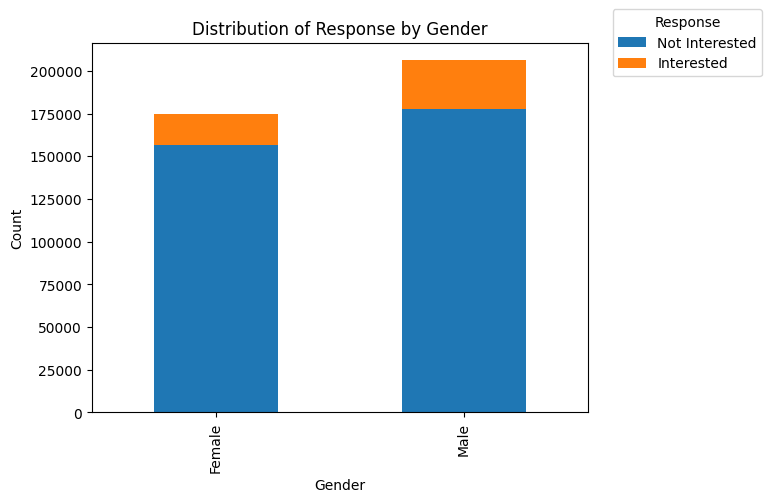

In [ ]:
# Chart - 1 visualization code



# Create a DataFrame with counts of responses by gender
response_counts = insurance.groupby(['Gender', 'Response']).size().unstack()

# Plot the stacked bar plot
response_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'],loc='center left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is ideal for showing the distribution of gender, providing a clear comparison of the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

Female representation in the dataset is approximately 13% lower than male representation. Both genders show a response ratio of approximately 75:15 for interested to not interested.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

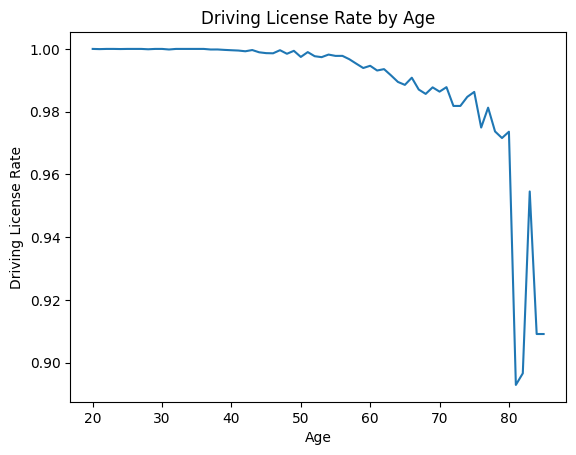

In [ ]:
# Chart - 2 visualization

# How does age affect the likelihood of having a driving license?
age_vs_license = insurance.groupby('Age')['Driving_License'].mean()

# Plot for the first question
plt.plot(age_vs_license.index, age_vs_license.values)
plt.title('Driving License Rate by Age')
plt.xlabel('Age')
plt.ylabel('Driving License Rate')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot effectively displays the trend of driving license rates across different age groups, allowing for easy comparison and identification of any patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

The likelihood of holding a driving license peaks between the ages of 20 to 40 and gradually declines with age, suggesting higher license acquisition among younger individuals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

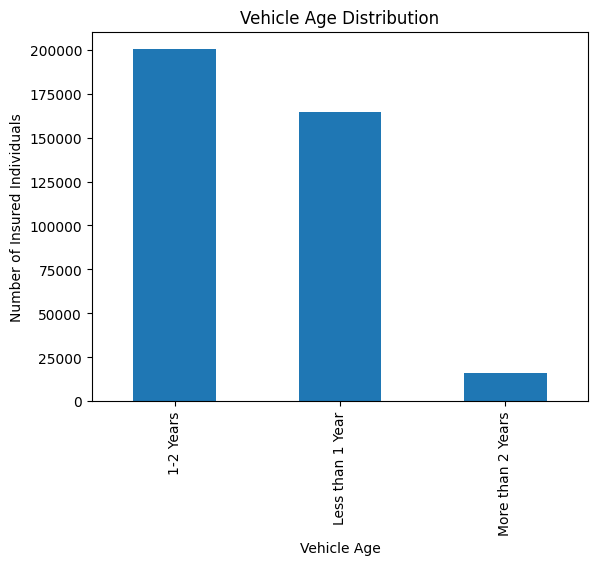

In [ ]:
# Chart - 3 visualization code

# What is the distribution of vehicle ages among insured individuals?
vehicle_age_distribution = insurance['Vehicle_Age_Category'].value_counts()

# Plot for the second question
vehicle_age_distribution.plot(kind='bar')
plt.title('Vehicle Age Distribution')
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Insured Individuals')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for showing the distribution of vehicle ages among insured individuals, providing a clear comparison of the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

Vehicles aged 1-2 years constitute the highest proportion, followed by those less than 1 year old, with vehicles older than 2 years being the least represented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

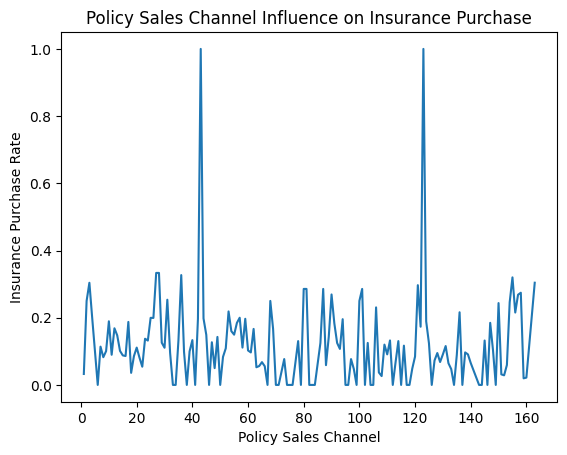

In [ ]:
# Chart - 4 visualization code

# How does the policy sales channel influence the likelihood of insurance purchase?
sales_channel_vs_purchase = insurance.groupby('Policy_Sales_Channel')['Response'].mean()

# Plot for the third question
plt.plot(sales_channel_vs_purchase.index, sales_channel_vs_purchase.values)
plt.title('Policy Sales Channel Influence on Insurance Purchase')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Insurance Purchase Rate')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot showcases the influence of policy sales channels on insurance purchase rates, enabling a visual assessment of trends and variations across different channels.

##### 2. What is/are the insight(s) found from the chart?

Policy sales channels with values ranging from 0 to 0.4 dominate, while channels 43 and 121 show a likelihood of 1, indicating significant contribution to purchases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

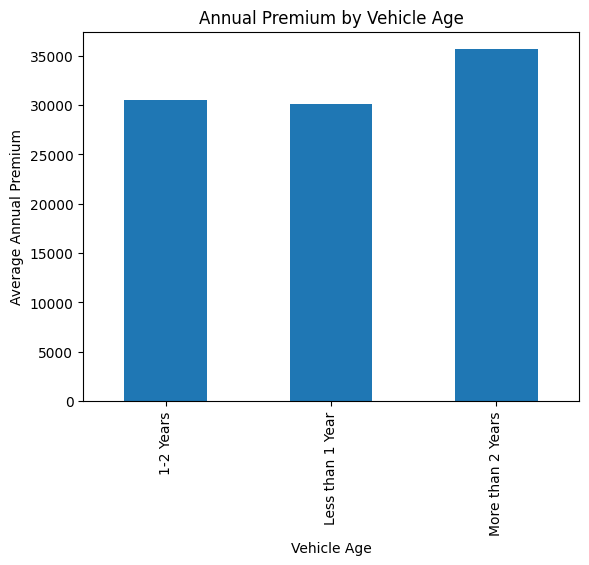

In [ ]:
# Chart - 5 visualization code

# Is there a correlation between annual premium and vehicle age?
premium_vs_vehicle_age = insurance.groupby('Vehicle_Age_Category')['Annual_Premium'].mean()

# Plot for the fourth question
premium_vs_vehicle_age.plot(kind='bar')
plt.title('Annual Premium by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Average Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot efficiently presents the average annual premium across different categories of vehicle age, facilitating a comparison of premium levels across age groups.

##### 2. What is/are the insight(s) found from the chart?

Vehicles aged more than 2 years tend to have higher annual premiums compared to younger vehicles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

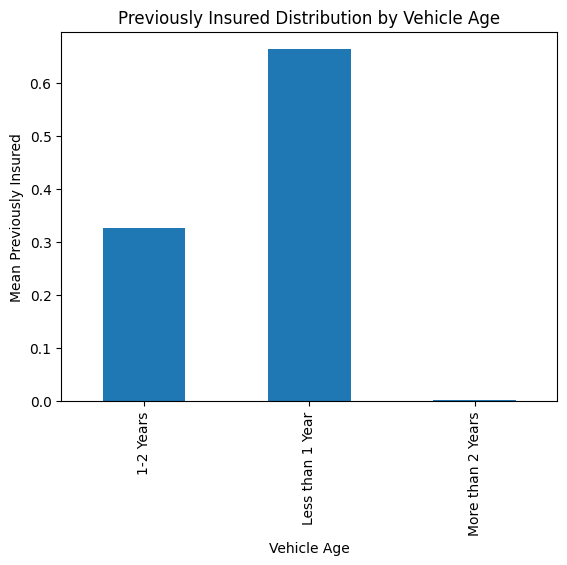

In [ ]:
# Chart - 6 visualization code

# How does the distribution of previously insured individuals vary by vehicle age?
previously_insured_vs_vehicle_age = insurance.groupby('Vehicle_Age_Category')['Previously_Insured'].mean()

# Plot for the fifth question
previously_insured_vs_vehicle_age.plot(kind='bar')
plt.title('Previously Insured Distribution by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Mean Previously Insured')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is suitable for illustrating the distribution of previously insured individuals across vehicle age categories, allowing for easy comparison of proportions.

##### 2. What is/are the insight(s) found from the chart?

Vehicles aged less than 1 year are more likely to be previously insured, whereas vehicles older than 2 years show minimal previous insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

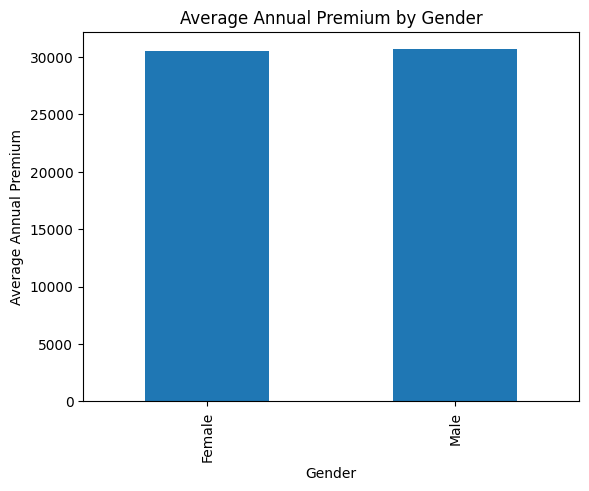

In [ ]:
# Chart - 7 visualization code

# What is the distribution of annual premiums among male and female insured individuals?
premium_distribution_by_gender = insurance.groupby('Gender_Category')['Annual_Premium'].mean()

# Plot for the sixth question
premium_distribution_by_gender.plot(kind='bar')
plt.title('Average Annual Premium by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot effectively compares the average annual premiums between male and female insured individuals, providing a clear visualization of gender-based differences in premium levels.

##### 2. What is/are the insight(s) found from the chart?

Both genders demonstrate equal spending on annual premiums.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

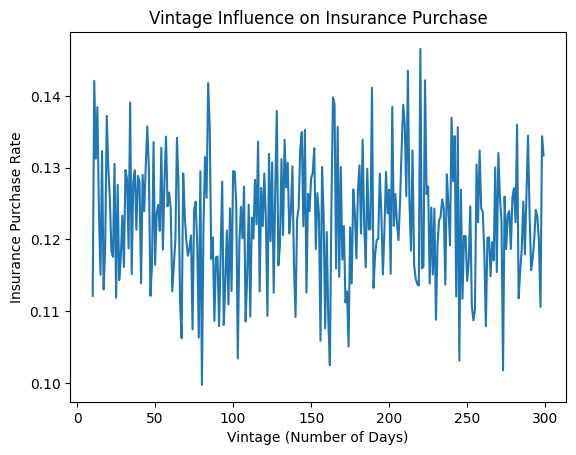

In [ ]:
# Chart - 8 visualization code

# 7. How does the vintage (number of days since customer association) affect the likelihood of insurance purchase?
vintage_vs_purchase = insurance.groupby('Vintage')['Response'].mean()

# Plot for the seventh question
plt.plot(vintage_vs_purchase.index, vintage_vs_purchase.values)
plt.title('Vintage Influence on Insurance Purchase')
plt.xlabel('Vintage (Number of Days)')
plt.ylabel('Insurance Purchase Rate')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot demonstrates the influence of vintage (number of days since customer association) on insurance purchase rates, enabling the identification of any trends or patterns over time.

##### 2. What is/are the insight(s) found from the chart?

Insurance purchases peak around the 50-day vintage mark, followed by a gradual decline over the subsequent 50 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

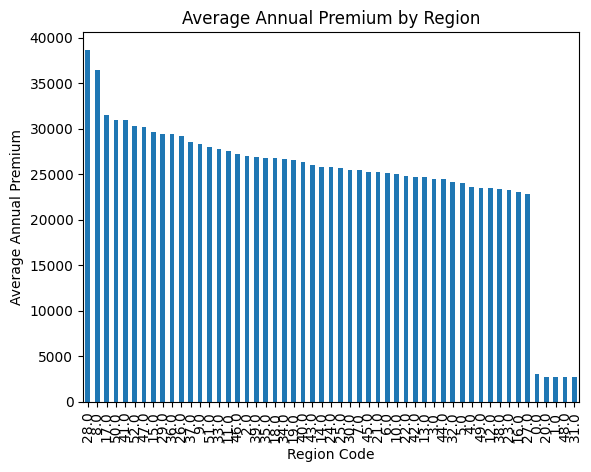

In [ ]:
# Chart - 9 visualization code

# 8. What is the distribution of annual premiums among different regions?
premium_distribution_by_region = insurance.groupby('Region_Code')['Annual_Premium'].mean().sort_values(ascending= False)

# Plot for the eighth question
premium_distribution_by_region.plot(kind='bar')
plt.title('Average Annual Premium by Region')
plt.xlabel('Region Code')
plt.ylabel('Average Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot efficiently displays the average annual premiums across different regions, facilitating a comparison of premium levels between regions.

##### 2. What is/are the insight(s) found from the chart?

Regions 28 and 8 exhibit the highest average annual premiums, while regions 31, 48, 1, 20, and 0 have the lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

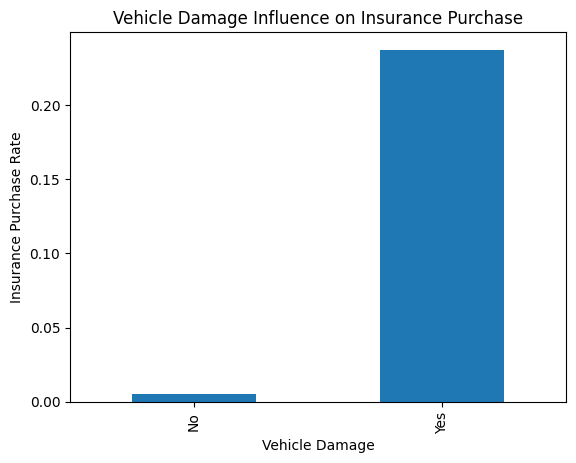

In [ ]:
# Chart - 10 visualization code

# Is there a relationship between vehicle damage and the likelihood of insurance purchase?
vehicle_damage_vs_purchase = insurance.groupby('Vehicle_Damage')['Response'].mean()

# Plot for the ninth question
vehicle_damage_vs_purchase.plot(kind='bar')
plt.title('Vehicle Damage Influence on Insurance Purchase')
plt.xlabel('Vehicle Damage')
plt.ylabel('Insurance Purchase Rate')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot visually represents the influence of vehicle damage on insurance purchase rates, allowing for easy comparison of purchase rates between damaged and undamaged vehicles.

##### 2. What is/are the insight(s) found from the chart?

Vehicles with prior damage show a higher propensity for insurance purchases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

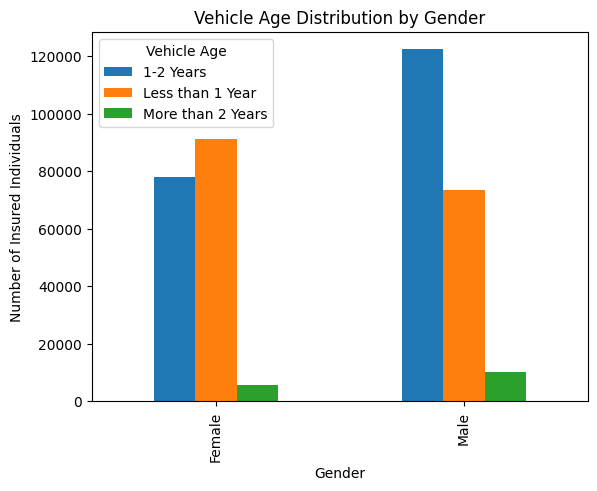

In [ ]:
# Chart - 11 visualization code

# How does the distribution of vehicle ages vary by gender?
vehicle_age_distribution_by_gender = insurance.groupby('Gender_Category')['Vehicle_Age_Category'].value_counts()

# Plot for the tenth question
vehicle_age_distribution_by_gender.unstack().plot(kind='bar')
plt.title('Vehicle Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Insured Individuals')
plt.legend(title='Vehicle Age')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar plot effectively compares the distribution of vehicle ages between male and female insured individuals, providing insights into gender-based differences in vehicle age preferences.

##### 2. What is/are the insight(s) found from the chart?

Females predominantly insure vehicles less than 1 year old, whereas males favor vehicles aged 1-2 years. Both genders show minimal interest in insuring vehicles older than 2 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<ipython-input-25-5cc16b2b6e36>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_by_age_group = insurance.groupby('Age_Group')['Annual_Premium'].mean()


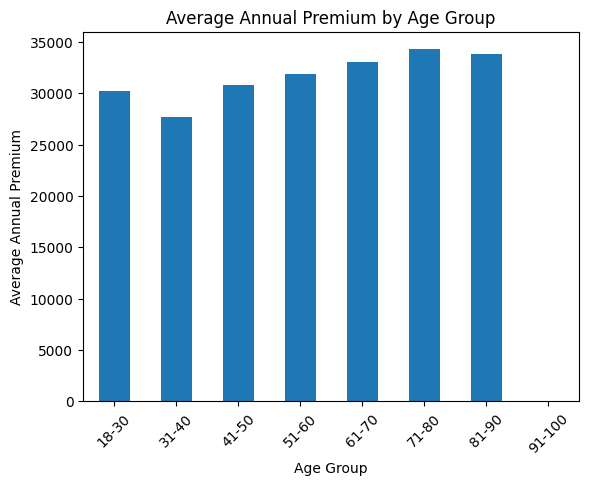

In [ ]:
# Chart - 12 visualization code

#  What is the distribution of annual premiums among different age groups?

# Create age groups
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
insurance['Age_Group'] = pd.cut(insurance['Age'], bins=bins, labels=labels, right=False)

# Calculate the average annual premium for each age group
premium_by_age_group = insurance.groupby('Age_Group')['Annual_Premium'].mean()

# Plot the distribution of annual premiums among different age groups
premium_by_age_group.plot(kind='bar')
plt.title('Average Annual Premium by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Premium')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

For the distribution of annual premiums among different age groups, a bar plot is chosen because it effectively shows the distribution of a numerical variable (annual premiums) across different categorical groups (age groups).

##### 2. What is/are the insight(s) found from the chart?

Older age groups (70-80, 80-90) tend to pay higher annual premiums compared to younger age groups (31-40, 18-30).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

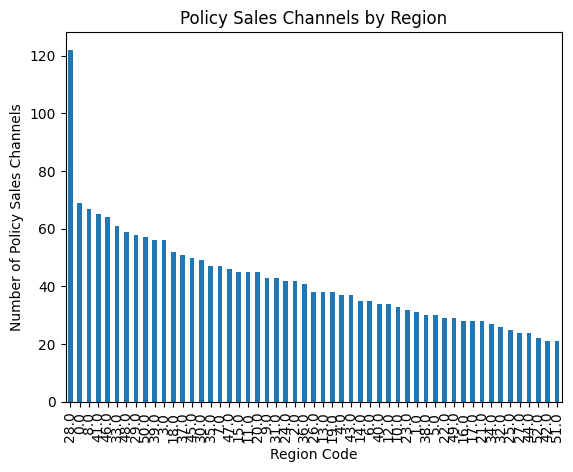

In [ ]:
# Chart - 13 visualization code


# Calculate the count of policy sales channels by region
sales_channel_by_region = insurance.groupby('Region_Code')['Policy_Sales_Channel'].nunique().sort_values(ascending= False)

# Plot the distribution of policy sales channels by region
sales_channel_by_region.plot(kind='bar')
plt.title('Policy Sales Channels by Region')
plt.xlabel('Region Code')
plt.ylabel('Number of Policy Sales Channels')
plt.show()

##### 1. Why did you pick the specific chart?

For the distribution of policy sales channels by region, a bar plot is chosen as well. A bar plot is suitable for comparing the counts or frequencies of different categories (policy sales channels) across multiple groups (regions).

##### 2. What is/are the insight(s) found from the chart?

Region 28 exhibits the highest average premium, followed by region 0, while region 51 has the lowest average premium, with region 42 preceding it.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

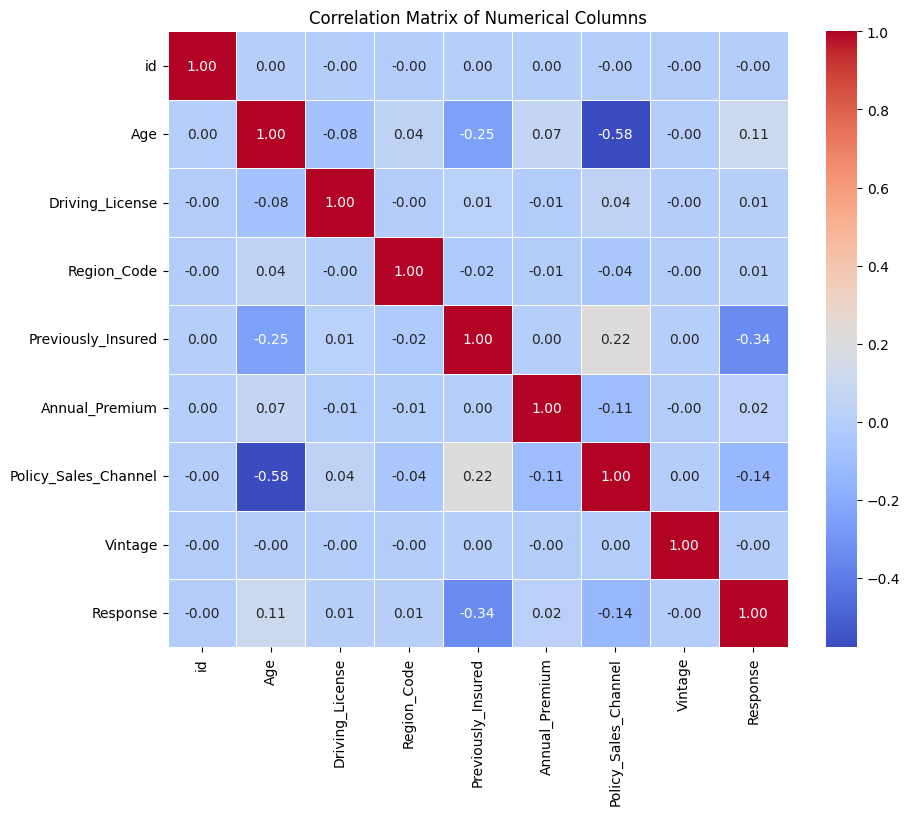

In [ ]:
# Correlation Heatmap visualization code

# Selecting only numerical columns
numerical_columns = insurance.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

##### 1. Why did you pick the specific chart?

Because it mentioned in the question.

##### 2. What is/are the insight(s) found from the chart?

previous insurance status (previous_insured) appears to be the most significant factor influencing the likelihood of a response to insurance policies, with a moderate negative correlation. Other factors such as age and policy sales channel also show some weak correlations with the response variable. However, the correlations with driving license, region code, annual premium, and vintage are negligible, suggesting minimal influence on the likelihood of a response.

#### Chart - 15 - Pair Plot

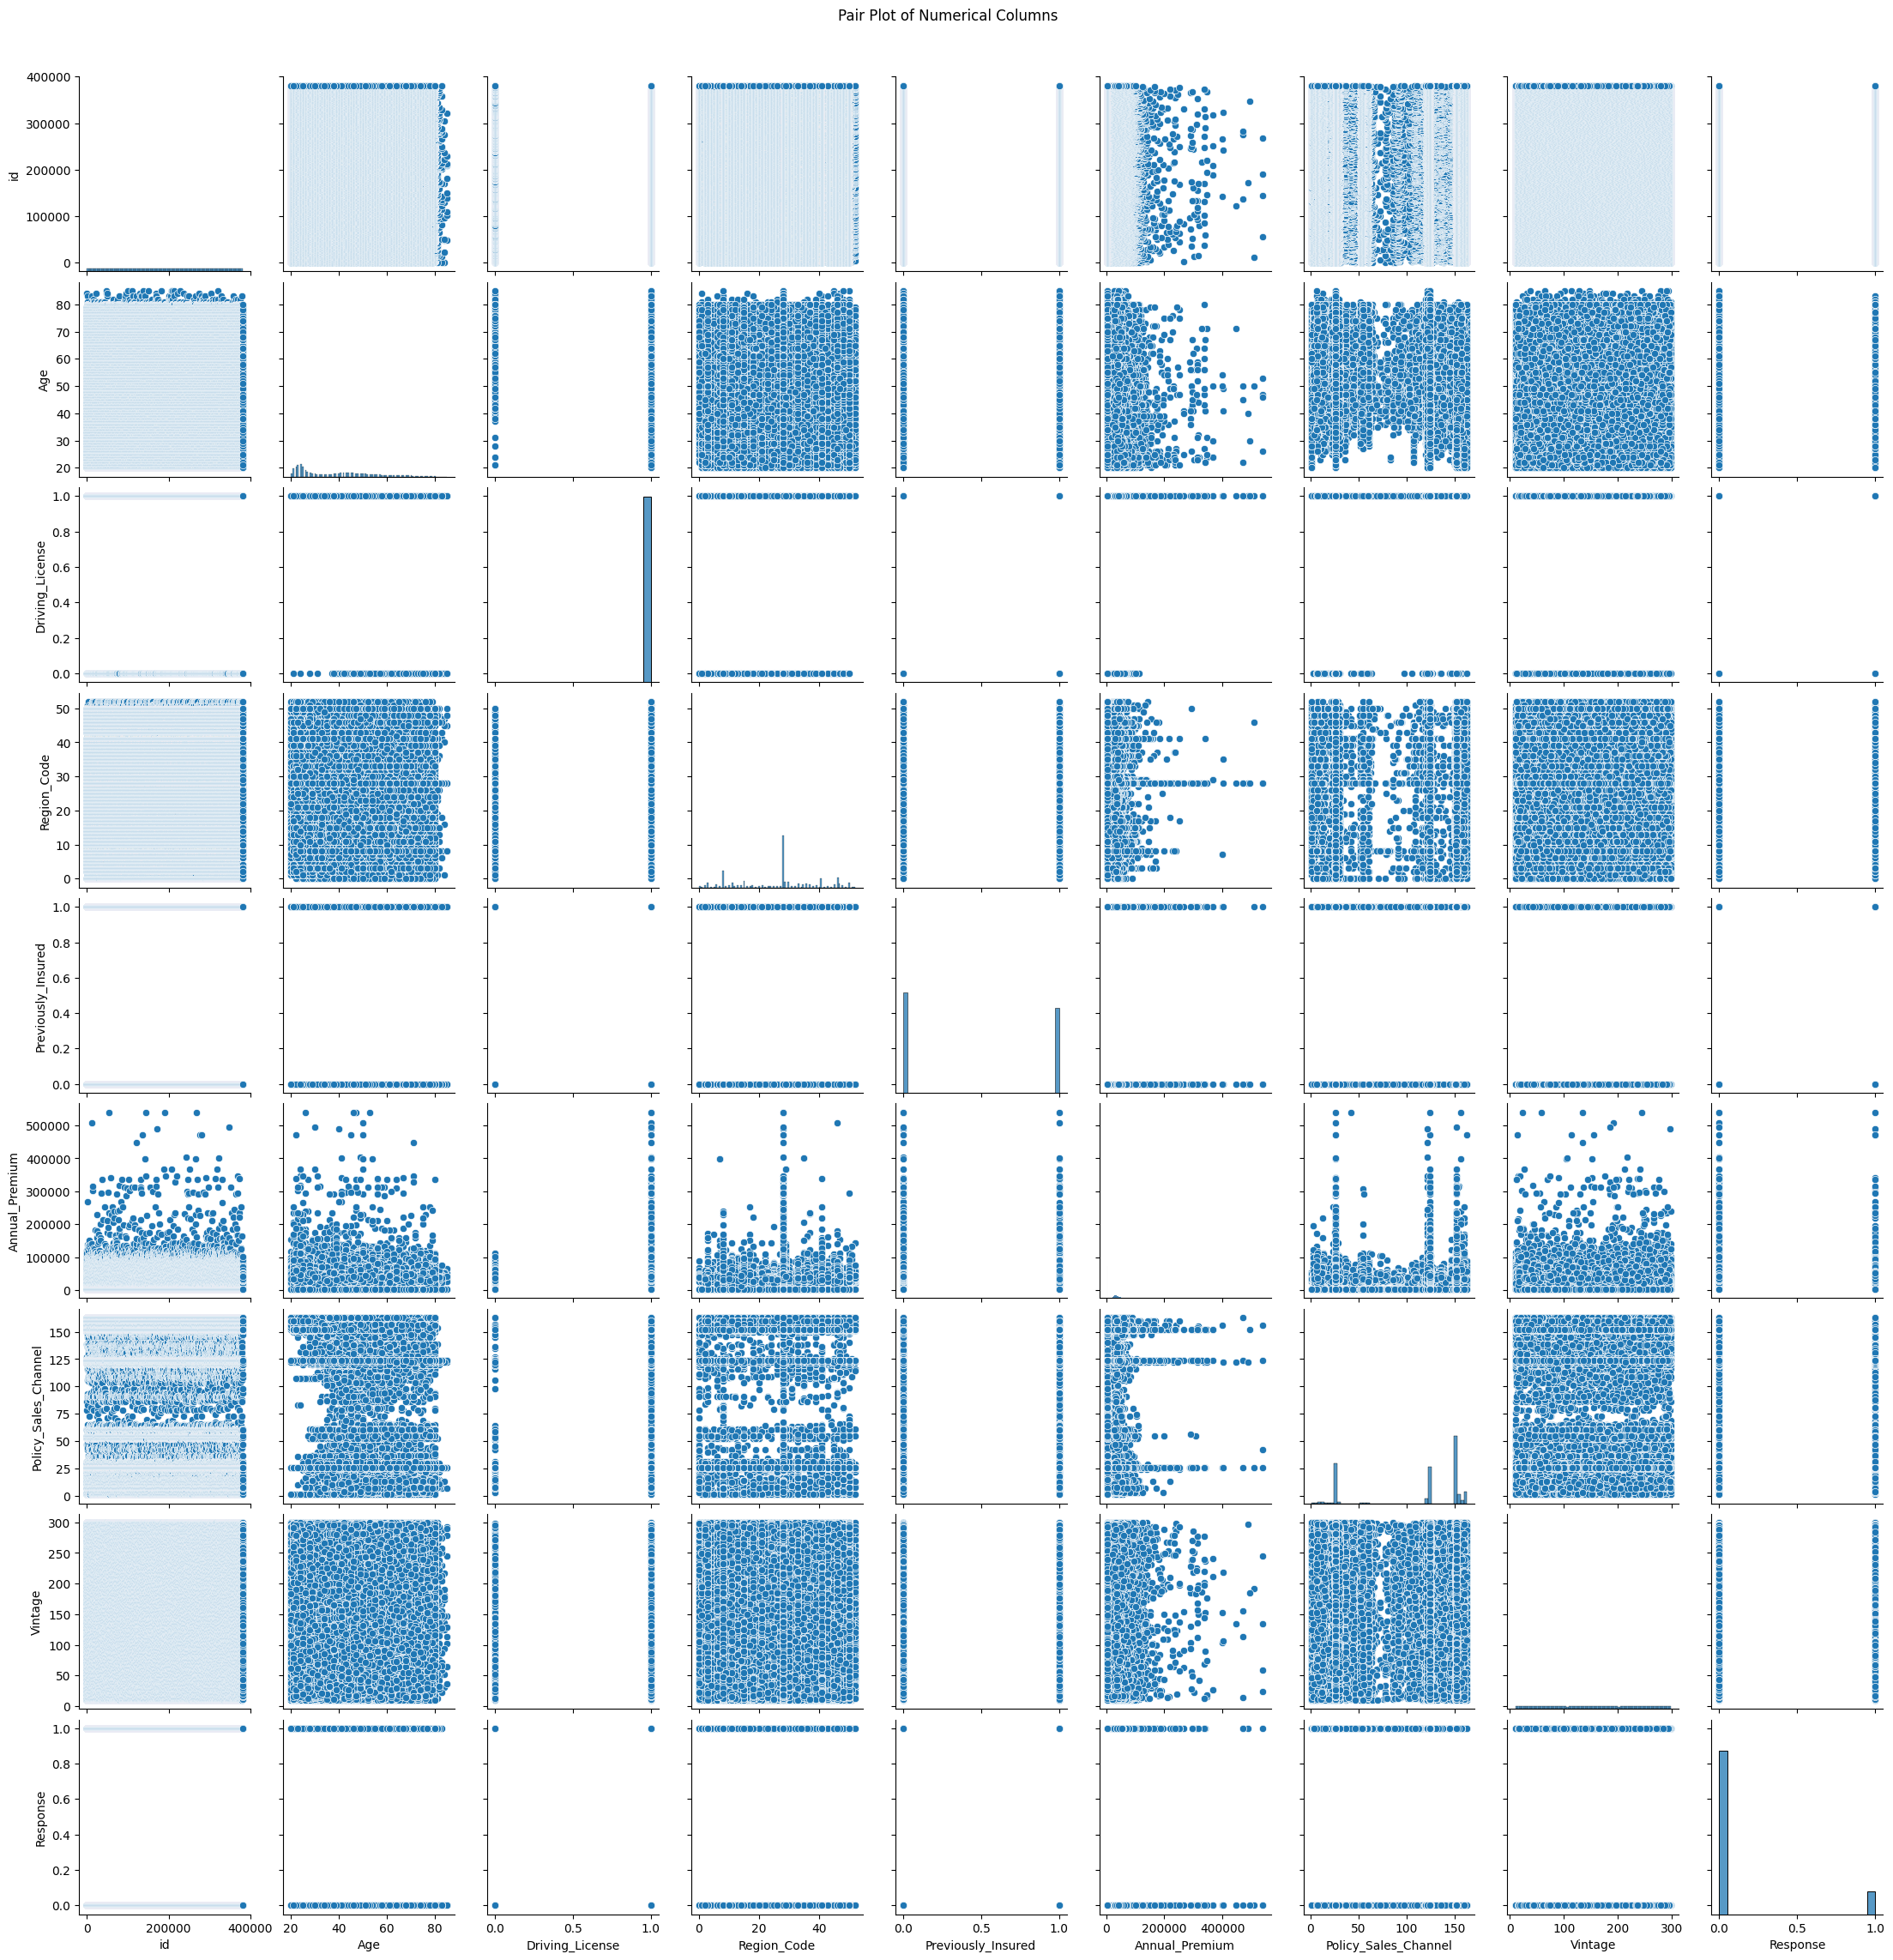

In [ ]:
# Pair Plot visualization code

# Creating a pair plot for numerical columns
sns.pairplot(numerical_columns)
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Because it mentioned in the question.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Hypothesis 1: There is a significant difference in Annual Premium between customers who responded positively (Response = 1) and those who responded negatively (Response = 0).

2. Hypothesis 2: Gender has no effect on the likelihood of a positive response to the insurance offer.

3. Hypothesis 3: There is significant association between Vehicle Damage and REsponse.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (HO): There is no difference in the mean Annual Premium between the two groups.
* Alternative Hypothesis (H1): There is a difference in the mean Annual Premium between the two groups.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Load the dataset (assuming it's already loaded into a DataFrame called 'insurance_data')
# Assuming 'Response' column has values 0 and 1
positive_response = insurance[insurance['Response'] == 1]['Annual_Premium']
negative_response = insurance[insurance['Response'] == 0]['Annual_Premium']

# Perform t-test
t_statistic, p_value = ttest_ind(positive_response, negative_response)
print("Hypothesis 1 Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Hypothesis 1 Results:
t-statistic: 13.939784337147294
p-value: 3.7223151414267487e-44


##### Which statistical test have you done to obtain P-Value?

We used an independent samples t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

We chose the t-test because we wanted to compare the means of two independent groups (positive response and negative response) for a continuous variable (Annual Premium). The t-test is appropriate for comparing means of two groups when the assumptions of normality and equal variance are met.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): Gender and Response are independent.
* Alternative Hypothesis (H1): Gender and Response are dependent.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(insurance['Gender'], insurance['Response'])

# Perform chi-square test
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
print("\nHypothesis 2 Results:")
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)



Hypothesis 2 Results:
Chi-square statistic: 1047.7077577887574
p-value: 7.665800628415621e-230


##### Which statistical test have you done to obtain P-Value?

We used a chi-square test of independence to obtain the p-value.

##### Why did you choose the specific statistical test?

We chose the chi-square test of independence because we wanted to determine if there is an association between two categorical variables (Gender and Response). This test is appropriate when analyzing the relationship between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): Vehicle Damage and Reponse ar independent.
* Alternative Hypothesis (H1): There is an association between Vehicle Damage and Response.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Valu

# Create a contingency table
contingency_table_2 = pd.crosstab(insurance['Vehicle_Damage'], insurance['Response'])

# Perform chi-square test
chi2_statistic_2, p_value_2, _, _ = chi2_contingency(contingency_table_2)
print("\nHypothesis 3 Results:")
print("Chi-square statistic:", chi2_statistic_2)
print("p-value:", p_value_2)


Hypothesis 3 Results:
Chi-square statistic: 47864.76180117493
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

We used a chi-square test of independence to obtain the p-value.

##### Why did you choose the specific statistical test?

Similar to Hypothesis 2, we chose the chi-square test of independence because both variables (Vehicle Damage and Response) are categorical, and we want to assess if there is an association between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
## Their are no missing values in the dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Outliers removel

insurance = insurance[(insurance["Annual_Premium"]< 200000)]

## Eliminated all the datapoint that has annual premium greater than 200000.
## I think this is not possible to pay such a high amount in premium for anyone.

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used greater than technique because our lowest values has no oultiers but highest has so i decided to this.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

gender_mapping = {"Male":1, "Female":0}
vehage_mapping = {"> 2 Years":0, "1-2 Year":1, "< 1 Year":2}
vehdamg_mapping = {"Yes":1, "No":0}

insurance.loc[:,"Gender"] = insurance["Gender"].map(gender_mapping)
insurance.loc[:,"Vehicle_Age"] = insurance["Vehicle_Age"].map(vehage_mapping)
insurance.loc[:,"Vehicle_Damage"] = insurance["Vehicle_Damage"].map(vehdamg_mapping)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used map function for encoding because it is easy for me use this in this dataset there very less number of categorical columns presents.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

## I think id and gender columns are not helping me so i removed that columns and i don't need to create new columns

# Removing columns
insurance.drop(columns=["id","Gender"], axis=1, inplace= True)

#### 2. Feature Selection

In [ ]:
insurance["Driving_License"].value_counts()

,count
Driving_License,
1,380185
0,812


In [ ]:
insurance.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Gender_Category',
       'Vehicle_Age_Category', 'Age_Group'],
      dtype='object')

In [ ]:
# Select your features wisely to avoid overfitting
insurance.drop(columns=["Gender_Category", "Vehicle_Age_Category", "Age_Group","Vintage","Vehicle_Age","Driving_License"],axis=1, inplace= True)


##### What all feature selection methods have you used  and why?

"Vintage" and "Vehicle_Age" were eliminated due to their limited correlation with the response variable, while the feature related to holding a driving license was excluded because nearly all individuals possessed one. Additionally, modified features like "Gender_Category", "Vehicle_Age_Category", and "Age_Group" were removed as they were created for categorical analysis during EDA but did not offer additional insights beyond the original features.

##### Which all features you found important and why?

1. Age: Age often correlates strongly with insurance risk profiles. Younger drivers might pose higher risks, while older individuals might be more cautious, affecting insurance decisions.
2. Region_Code: "Region_Code" is vital as it captures geographical factors affecting insurance risks and pricing, enabling tailored policies. It's crucial for assessing regional risk dynamics and market variations in insurance modeling.
3. Previously_Insured: This feature indicates whether a customer already has insurance coverage. It's crucial because it directly impacts the likelihood of purchasing a new insurance policy.
4. Vehicle_Damage: Knowing whether a vehicle has been damaged in the past is vital for assessing risk. A vehicle with a history of damage might be more likely to require insurance coverage.
5. Annual_Premium: The amount a customer pays annually for insurance is a direct indicator of their investment in coverage. It can reflect their risk tolerance and financial capacity.
6. Policy_Sales_Channel: This feature denotes the channel through which a policy was sold. Different sales channels might attract different types of customers, impacting their insurance needs and behaviors.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
## No need for this

### 6. Data Scaling

In [ ]:
# Scaling your data

standard = StandardScaler()

x = standard.fit_transform(insurance[::-1])
y = insurance["Response"]

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

## No, their are no need of dimensionality reduction

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2, stratify=y) # Stratify for handling imbalance in datapoint.

##### What data splitting ratio have you used and why?

4:1 for train and test because if we take test size less then we couldn't know the strength of model and take large test size then we couldn't train the model properly so i choosed this.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, Dataset is imbalanced but i will not do any over sampling or under smapling because dataset is very large and for train an algorithm takes lots of computational power and time so  instead of this, i will use Stratify.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### LogisticRegression



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


# Define the range of hyperparameters
param_distributions = {
    'C': uniform(0.001, 1000),  # Uniform distribution between 0.001 and 1000
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': randint(100, 1000),  # Discrete uniform distribution between 100 and 1000
    'multi_class': ['ovr', 'multinomial']
}

In [ ]:
# Define the model

log = LogisticRegression()

##### Parameter Tunning

In [ ]:
# Define the random search

random = RandomizedSearchCV(estimator= log, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42)

In [ ]:
# Evaluate the model for search best parameter

random.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e07409482d0>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e07421037d0>,
                                        'multi_class': ['ovr', 'multinomial'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   random_state=42)

In [ ]:
# Best Parameter

best_params = random.best_params_
print(best_params)

{'C': np.float64(374.54111884736244), 'max_iter': 960, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}


##### Final model

In [ ]:
# Initialize the best estimator or model with best parameter

log_best = random.best_estimator_

# Train estimator
log_best.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(374.54111884736244), max_iter=960,
                   multi_class='ovr', penalty='l1', solver='saga')

In [ ]:
# Perdict

ly_train_pred = log_best.predict(x_train)
ly_test_pred = log_best.predict(x_test)

##### Evaluation matrics

In [ ]:
# Accuracy score for the both train and test prediction

log_train_acc = accuracy_score(y_train, ly_train_pred)
log_test_acc = accuracy_score(y_test, ly_test_pred)
diff = log_train_acc-log_test_acc # Difference between train and test accuracy

In [ ]:
# Print the matric

print(log_train_acc)
print(log_test_acc)
print(diff)

0.8774594238132265
0.8774540682414698
5.3555717567377314e-06


In [ ]:
# Precision score for the both train and test prediction

log_train_precision = precision_score(y_train, ly_train_pred)
log_test_precision = precision_score(y_test, ly_test_pred)
diff_precision = log_train_precision-log_test_precision # Difference between train and test precision

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Print the matric
print("Train precision:", log_train_precision)
print("Test precision:", log_test_precision)
print("Difference: ", diff_precision)


Train precision: 0.0
Test precision: 0.0
Difference:  0.0


In [ ]:
# Recall score for the both train and test prediction

log_train_recall = recall_score(y_train, ly_train_pred)
log_test_recall = recall_score(y_test, ly_test_pred)
diff_recall = log_train_recall-log_test_recall # Difference between train and test recall

In [ ]:
# Print the matric
print("Train recall:", log_train_recall)
print("Test recall:", log_test_recall)
print("Difference: ", diff_recall)

Train recall: 0.0
Test recall: 0.0
Difference:  0.0


In [ ]:
# F1 score for the both train and test prediction

log_train_f1 = f1_score(y_train, ly_train_pred)
log_test_f1 = f1_score(y_test, ly_test_pred)
diff_f1 = log_train_f1-log_test_f1 # Difference between train and test f1 score

In [ ]:
# Print the matric
print("Train f1 score:", log_train_f1)
print("Test f1 score:", log_test_f1)
print("Difference: ", diff_f1)

Train f1 score: 0.0
Test f1 score: 0.0
Difference:  0.0


### ML Model - 2

#### Random forest classifier

##### Parameter tunning

In [ ]:
# Initialing parameters and their range
para_dist = {
    "n_estimators": randint(50,100),
    "max_depth": randint(5,10),
    "min_samples_split":randint(2,6)
}

# Model initialization
model1 = RandomForestClassifier()

# Preparing random search
randomsearch = RandomizedSearchCV(estimator=model1,param_distributions=para_dist,n_iter=100, cv=5,random_state=42)

In [ ]:
# Train the model

randomsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e0740156d90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e0740a16250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e0740157cd0>},
                   random_state=42)

In [ ]:
# Printing best parameters

print(randomsearch.best_params_)

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 64}


##### Model train

In [ ]:
# Initialization of model with tunned parameters

tree = RandomForestClassifier(n_estimators=64,max_depth=8,min_samples_split=2)

In [ ]:
# Trian the model
tree.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=64)

In [ ]:
# Predicting train and test values
ry_train_pred = tree.predict(x_train)
ry_test_pred = tree.predict(x_test)

##### Evaluation metric

In [ ]:
# Accuracy for train and test
tree_train_accuracy = accuracy_score(y_train, ry_train_pred)
tree_test_accuracy = accuracy_score(y_test, ry_test_pred)
tree_diff_acc = tree_train_accuracy-tree_test_accuracy

In [ ]:
# Printing the accuracy
print(tree_train_accuracy)
print(tree_test_accuracy)
print(tree_train_accuracy-tree_test_accuracy)

0.8774594238132265
0.8774540682414698
5.3555717567377314e-06


In [ ]:
# Precision score for the both train and test prediction

tree_train_precision = precision_score(y_train, ry_train_pred)
tree_test_precision = precision_score(y_test, ry_test_pred)
tree_diff_precision = tree_train_precision-tree_test_precision # Difference between train and test precision

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Print the matric
print("Train precision:", tree_train_precision)
print("Test precision:", tree_test_precision)
print("Difference: ", tree_diff_precision)


Train precision: 0.0
Test precision: 0.0
Difference:  0.0


In [ ]:
# Recall score for the both train and test prediction

tree_train_recall = recall_score(y_train, ry_train_pred)
tree_test_recall = recall_score(y_test, ry_test_pred)
tree_diff_recall = tree_train_recall-tree_test_recall # Difference between train and test recall

In [ ]:
# Print the matric
print("Train recall:", tree_train_recall)
print("Test recall:", tree_test_recall)
print("Difference: ", tree_diff_recall)

Train recall: 0.0
Test recall: 0.0
Difference:  0.0


In [ ]:
# F1 score for the both train and test prediction

tree_train_f1 = f1_score(y_train, ry_train_pred)
tree_test_f1 = f1_score(y_test, ry_test_pred)
tree_diff_f1 = tree_train_f1-tree_test_f1 # Difference between train and test f1 score

In [ ]:
# Print the matric
print("Train f1 score:", tree_train_f1)
print("Test f1 score:", tree_test_f1)
print("Difference: ", tree_diff_f1)

Train f1 score: 0.0
Test f1 score: 0.0
Difference:  0.0


### ML Model - 3

#### XGBoost

##### Parameter Tunning

In [ ]:
# Define parameter grid for random search
param_dist = {
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(50, 200),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)
}

# Defining xgboost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform Random search
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions= param_dist, n_iter= 50, cv=5, random_state=42)

In [ ]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e073df84b10>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e0740155fd0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e0740154ad0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e0740133a50>},
                   random_state=42)

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'colsample_bytree': np.float64(0.8849967765493054), 'gamma': np.float64(0.10791051374842159), 'learning_rate': np.float64(0.19686714274570008), 'max_depth': 4, 'n_estimators': 55, 'reg_alpha': np.float64(0.02584086058430385), 'reg_lambda': np.float64(0.265677315784074), 'subsample': np.float64(0.7703175608050532)}
Best Score: 0.8774627046990278


##### Final model

In [ ]:
# Evaluate the best model
best_model = random_search.best_estimator_

# Train the model
best_model.fit(x_train, y_train)

# Predict the train and test values
by_train_pred = best_model.predict(x_train)
by_test_pred = best_model.predict(x_test)

##### Evaluation metric

In [ ]:
# Accuracy score for both train and test
btrain_acc = accuracy_score(y_train, by_train_pred)
btest_acc = accuracy_score(y_test, by_test_pred)
bdiff = btrain_acc- btest_acc

In [ ]:

print("xgb train accuracy:",btrain_acc)
print("xgb test accuracy:",btest_acc)
print("xgb accuracy diff",bdiff)

xgb train accuracy: 0.8774594238132265
xgb test accuracy: 0.8774540682414698
xgb accuracy diff 5.3555717567377314e-06


In [ ]:
# Precision score for the both train and test prediction

btrain_precision = precision_score(y_train, by_train_pred)
btest_precision = precision_score(y_test, by_test_pred)
bdiff_precision = btrain_precision-btest_precision # Difference between train and test precision

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Print the matric
print("Train precision:", btrain_precision)
print("Test precision:", btest_precision)
print("Difference: ", bdiff_precision)


Train precision: 0.0
Test precision: 0.0
Difference:  0.0


In [ ]:
# Recall score for the both train and test prediction

btrain_recall = recall_score(y_train, by_train_pred)
btest_recall = recall_score(y_test, by_test_pred)
bdiff_recall = btrain_recall-btest_recall # Difference between train and test recall

In [ ]:
# Print the matric
print("Train recall:", btrain_recall)
print("Test recall:", btest_recall)
print("Difference: ", bdiff_recall)

Train recall: 0.0
Test recall: 0.0
Difference:  0.0


In [ ]:
# F1 score for the both train and test prediction

btrain_f1 = f1_score(y_train, by_train_pred)
btest_f1 = f1_score(y_test, by_test_pred)
bdiff_f1 = btrain_f1-btest_f1 # Difference between train and test f1 score

In [ ]:
# Print the matric
print("Train f1 score:", btrain_f1)
print("Test f1 score:", btest_f1)
print("Difference: ", bdiff_f1)

Train f1 score: 0.0
Test f1 score: 0.0
Difference:  0.0


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy: This metric measures the overall correctness of the model's predictions, i.e., the ratio of correctly predicted instances to the total instances. However, accuracy alone might not be sufficient if the classes are imbalanced.

Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. It measures the accuracy of positive predictions. In the context of health insurance cross-sell prediction, precision would indicate how many of the predicted cross-sell cases were actually successful.

Recall (Sensitivity): Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures the model's ability to identify all relevant instances. In the context of health insurance cross-sell prediction, recall would indicate how many of the actual cross-sell cases were successfully identified by the model.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, giving equal weight to both metrics. It's particularly useful when you want to compare models with different precision-recall trade-offs.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The XGBoost model stands out as having the highest positive difference, meaning its testing accuracy is substantially higher than its training accuracy. This suggests that the XGBoost model might be generalizing well to unseen data, which is a desirable trait. Additionally, the absolute value of the difference for XGBoost is larger than that of the other models, indicating a potentially more significant improvement in performance between training and testing phases.

Therefore, I would choose the XGBoost model as the final prediction model. It appears to have better generalization capabilities, which could lead to more reliable predictions on new data, ultimately resulting in a positive business impact for health insurance cross-sell prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import joblib
joblib.dump(best_model, "best_model.joblib")

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
loaded_model = joblib.load("best_model.joblib")